Keras
 
모델구성      
parameter tunning      
scikits 연결


In [4]:
# 회귀

from keras.models import Sequential   # models subpackage
from keras.layers import Dense      # layers => model 구성
from sklearn.datasets import make_regression
# 신경망 - 정규화
from sklearn.preprocessing import MinMaxScaler

# X = 100x2,  y = 100 (열)  
X,y = make_regression(n_samples = 100, n_features = 2, noise = 0.1, random_state = 1)
#                        관측치 100개     변수가 2개
# 데이터 사이즈가 다르다 : 값의 범위가 다름
scalarX, scalarY = MinMaxScaler(), MinMaxScaler()
scalarX.fit(X)   # 민맥스가 됨
scalarY.fit(y.reshape(100,1)) # 위에서 y는 열이었는데 여기서 행으로 바꾸는 것

X = scalarX.transform(X)
y = scalarY.transform(y.reshape(100,1))

# keras model  (dense 망)  <- 자동으로 가중치 만들어준다 (따로 지정하지 않는다)
# dense는 FFNN망을 사용할때 쓴다
model = Sequential()
# layer depth
# X = 100x2      dense(4) : 출력차수를 지정 => 2x4 의 가중치 만들어짐 ==> 결국 나가는 차수는 100x4
model.add(Dense(4, input_dim = 2, activation = 'relu'))  # input_dim(100x2)
# 100x4 , 4x4 => 100x4 
model.add(Dense(4, activation = 'relu'))
# 100x4 , 4x1 => 100x1  => 예측 (linear 선형이라사 예측)
model.add(Dense(1, activation = 'linear'))

# backend = tensorflow (로 바꿔준다)
# mse ( 회귀),  cross entrophy, KL-divergence: 분포를 비교
model.compile(loss='mse', optimizer='adam')  # tensorflow 모델을 변환
model.fit(X, y, epochs=1000, verbose=0)  # <- 텐서에서 미니마이즈 한 후에 epoch 돌리는 for 문 대신 사용

Xnew, a = make_regression(n_samples=3, n_features=2, noise=0, random_state= 1)
Xnew = scalarX.transform(Xnew)
ynew = model.predict(Xnew)
for i in range(len(Xnew)):
    print("입력 데이터=%s, 예측결과=%s" % (Xnew[i], ynew[i]))

입력 데이터=[0.29466096 0.30317302], 예측결과=[0.17314069]
입력 데이터=[0.02884127 0.6208843 ], 예측결과=[0.40278667]
입력 데이터=[0.39445118 0.79390858], 예측결과=[0.7445199]


In [5]:
from keras.models import Sequential  # 입력 하나, 아웃풋도 하나인 망
from keras.layers import Dense
import numpy
numpy.random.seed(7)
dataset = numpy.loadtxt("pima.data", delimiter=",")

X = dataset[:,0:8]  # 8개의 독립 변수
Y = dataset[:,8] # 종속변수

model = Sequential()  # 들어오는 데이터공간
# ?x8, 8x12  =>  
model.add(Dense(12, input_dim=8, activation='relu'))  
# ?x12 , 12x8 => ?x8
model.add(Dense(8, activation='relu'))
# ?x8 , 8x1  => ?x1  분류  (sigmoid <- 확률)
model.add(Dense(1, activation='sigmoid'))  # 0.5

# metrics=['accuracy'] : 내가 보고싶은게 'accuracy' 라고 지정 
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model.fit(X,Y, epochs=150, batch_size=10)


scores = model.evaluate(X,Y)

# 2번째 accuracy 
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))  # accuracy: 71.61%



model.add(Dense(12, input_dim=8, kernel_initializer = 'uniform', activation='relu'))  



Epoch 1/150
768/768 [==============================] - 0s 417us/step - loss: 3.1734 - accuracy: 0.5833
Epoch 2/150
768/768 [==============================] - 0s 96us/step - loss: 0.9554 - accuracy: 0.5729
Epoch 3/150
768/768 [==============================] - 0s 93us/step - loss: 0.7630 - accuracy: 0.6315
Epoch 4/150
768/768 [==============================] - 0s 82us/step - loss: 0.7226 - accuracy: 0.6471
Epoch 5/150
768/768 [==============================] - 0s 92us/step - loss: 0.6941 - accuracy: 0.6732
Epoch 6/150
768/768 [==============================] - 0s 87us/step - loss: 0.6683 - accuracy: 0.6836
Epoch 7/150
768/768 [==============================] - 0s 83us/step - loss: 0.6628 - accuracy: 0.6719
Epoch 8/150
768/768 [==============================] - 0s 86us/step - loss: 0.6482 - accuracy: 0.6836
Epoch 9/150
768/768 [==============================] - 0s 86us/step - loss: 0.6346 - accuracy: 0.7018
Epoch 10/150
768/768 [==============================] - 0s 88us/step - loss: 0.64

768/768 [==============================] - 0s 90us/step - loss: 0.5157 - accuracy: 0.7591
Epoch 81/150
768/768 [==============================] - 0s 90us/step - loss: 0.5087 - accuracy: 0.7591
Epoch 82/150
768/768 [==============================] - 0s 91us/step - loss: 0.5025 - accuracy: 0.7500
Epoch 83/150
768/768 [==============================] - 0s 84us/step - loss: 0.5047 - accuracy: 0.7474
Epoch 84/150
768/768 [==============================] - 0s 83us/step - loss: 0.4985 - accuracy: 0.7565
Epoch 85/150
768/768 [==============================] - 0s 90us/step - loss: 0.5061 - accuracy: 0.7409
Epoch 86/150
768/768 [==============================] - 0s 99us/step - loss: 0.5107 - accuracy: 0.7370
Epoch 87/150
768/768 [==============================] - 0s 96us/step - loss: 0.5006 - accuracy: 0.7526
Epoch 88/150
768/768 [==============================] - 0s 92us/step - loss: 0.5011 - accuracy: 0.7617
Epoch 89/150
768/768 [==============================] - 0s 83us/step - loss: 0.5044 - 

Epoch 1/150
768/768 [==============================] - 0s 440us/step - loss: 0.6723 - accuracy: 0.6081
Epoch 2/150
768/768 [==============================] - 0s 92us/step - loss: 0.6213 - accuracy: 0.6693
Epoch 3/150
768/768 [==============================] - 0s 99us/step - loss: 0.6118 - accuracy: 0.6836
Epoch 4/150
768/768 [==============================] - 0s 92us/step - loss: 0.6095 - accuracy: 0.6784
Epoch 5/150
768/768 [==============================] - 0s 103us/step - loss: 0.6020 - accuracy: 0.6836
Epoch 6/150
768/768 [==============================] - 0s 88us/step - loss: 0.5845 - accuracy: 0.6849
Epoch 7/150
768/768 [==============================] - 0s 95us/step - loss: 0.5937 - accuracy: 0.6719
Epoch 8/150
768/768 [==============================] - 0s 95us/step - loss: 0.5938 - accuracy: 0.6797
Epoch 9/150
768/768 [==============================] - 0s 90us/step - loss: 0.5874 - accuracy: 0.7044
Epoch 10/150
768/768 [==============================] - 0s 84us/step - loss: 0.5

768/768 [==============================] - 0s 91us/step - loss: 0.4946 - accuracy: 0.7578
Epoch 81/150
768/768 [==============================] - 0s 88us/step - loss: 0.4904 - accuracy: 0.7773
Epoch 82/150
768/768 [==============================] - 0s 84us/step - loss: 0.4978 - accuracy: 0.7682
Epoch 83/150
768/768 [==============================] - 0s 90us/step - loss: 0.4940 - accuracy: 0.7656
Epoch 84/150
768/768 [==============================] - 0s 87us/step - loss: 0.4895 - accuracy: 0.7656
Epoch 85/150
768/768 [==============================] - 0s 95us/step - loss: 0.4974 - accuracy: 0.7734
Epoch 86/150
768/768 [==============================] - 0s 97us/step - loss: 0.4981 - accuracy: 0.7669
Epoch 87/150
768/768 [==============================] - 0s 94us/step - loss: 0.4926 - accuracy: 0.7682
Epoch 88/150
768/768 [==============================] - 0s 88us/step - loss: 0.4839 - accuracy: 0.7695
Epoch 89/150
768/768 [==============================] - 0s 95us/step - loss: 0.4923 - 

514/514 [==============================] - 0s 142us/step - loss: 0.4902 - accuracy: 0.7899 - val_loss: 0.4615 - val_accuracy: 0.7559
Epoch 7/150
514/514 [==============================] - 0s 113us/step - loss: 0.4842 - accuracy: 0.7704 - val_loss: 0.4594 - val_accuracy: 0.8071
Epoch 8/150
514/514 [==============================] - 0s 122us/step - loss: 0.4971 - accuracy: 0.7588 - val_loss: 0.4493 - val_accuracy: 0.8110
Epoch 9/150
514/514 [==============================] - 0s 114us/step - loss: 0.4895 - accuracy: 0.7685 - val_loss: 0.4396 - val_accuracy: 0.7953
Epoch 10/150
514/514 [==============================] - 0s 113us/step - loss: 0.4766 - accuracy: 0.7763 - val_loss: 0.4840 - val_accuracy: 0.7874
Epoch 11/150
514/514 [==============================] - 0s 118us/step - loss: 0.4913 - accuracy: 0.7704 - val_loss: 0.4565 - val_accuracy: 0.8110
Epoch 12/150
514/514 [==============================] - 0s 118us/step - loss: 0.4826 - accuracy: 0.7626 - val_loss: 0.4704 - val_accuracy: 0

514/514 [==============================] - 0s 118us/step - loss: 0.4889 - accuracy: 0.7510 - val_loss: 0.4551 - val_accuracy: 0.7756
Epoch 63/150
514/514 [==============================] - 0s 114us/step - loss: 0.4787 - accuracy: 0.7607 - val_loss: 0.4529 - val_accuracy: 0.7913
Epoch 64/150
514/514 [==============================] - 0s 111us/step - loss: 0.4746 - accuracy: 0.7743 - val_loss: 0.4677 - val_accuracy: 0.7992
Epoch 65/150
514/514 [==============================] - 0s 118us/step - loss: 0.5130 - accuracy: 0.7549 - val_loss: 0.4934 - val_accuracy: 0.7480
Epoch 66/150
514/514 [==============================] - 0s 113us/step - loss: 0.4930 - accuracy: 0.7471 - val_loss: 0.4544 - val_accuracy: 0.7874
Epoch 67/150
514/514 [==============================] - 0s 109us/step - loss: 0.4784 - accuracy: 0.7704 - val_loss: 0.4909 - val_accuracy: 0.7953
Epoch 68/150
514/514 [==============================] - 0s 120us/step - loss: 0.4901 - accuracy: 0.7588 - val_loss: 0.4549 - val_accuracy

514/514 [==============================] - 0s 122us/step - loss: 0.4658 - accuracy: 0.7899 - val_loss: 0.4582 - val_accuracy: 0.7953
Epoch 119/150
514/514 [==============================] - 0s 138us/step - loss: 0.4705 - accuracy: 0.7588 - val_loss: 0.4584 - val_accuracy: 0.8031
Epoch 120/150
514/514 [==============================] - 0s 128us/step - loss: 0.4575 - accuracy: 0.7568 - val_loss: 0.4525 - val_accuracy: 0.7913
Epoch 121/150
514/514 [==============================] - 0s 122us/step - loss: 0.4546 - accuracy: 0.7938 - val_loss: 0.4689 - val_accuracy: 0.7795
Epoch 122/150
514/514 [==============================] - 0s 120us/step - loss: 0.4688 - accuracy: 0.7763 - val_loss: 0.4513 - val_accuracy: 0.8031
Epoch 123/150
514/514 [==============================] - 0s 124us/step - loss: 0.4538 - accuracy: 0.7763 - val_loss: 0.4517 - val_accuracy: 0.8071
Epoch 124/150
514/514 [==============================] - 0s 114us/step - loss: 0.4525 - accuracy: 0.7840 - val_loss: 0.4623 - val_ac

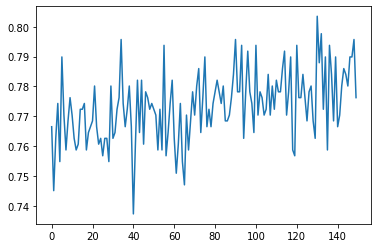

In [6]:
# 가중치 초기화  (kernel_initializer = 'uniform') : uniform : 균등하게

import matplotlib.pyplot as plt
from keras.models import Sequential  # 입력 하나, 아웃풋도 하나인 망
from keras.layers import Dense
import numpy
numpy.random.seed(7)
dataset = numpy.loadtxt("pima.data", delimiter=",")

X = dataset[:,0:8]  # 8개의 독립 변수
Y = dataset[:,8] # 종속변수

model = Sequential()  # 들어오는 데이터공간
# ?x8, 8x12  =>  
model.add(Dense(12, input_dim=8, kernel_initializer = 'uniform', activation='relu'))   
# ?x12 , 12x8 => ?x8
model.add(Dense(8, activation='relu'))
# ?x8 , 8x1  => ?x1  분류  (sigmoid <- 확률)
model.add(Dense(1, activation='sigmoid'))  # 0.5

# metrics=['accuracy'] : 내가 보고싶은게 'accuracy' 라고 지정 
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model.fit(X,Y, epochs=150, batch_size=10)

history = model.fit(X, Y, validation_split=0.33, epochs = 150, batch_size=10)
scores = model.evaluate(X,Y)

# 2번째 accuracy 
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))  # accuracy: 71.61%

 

# 데이터 분리 입력( train, test) : 과적합
# train, validation, test 로 나눠준다

print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.show()

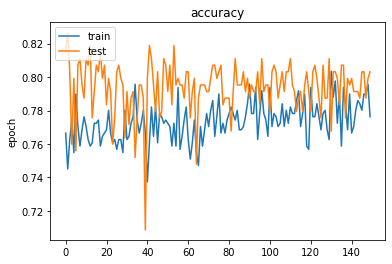

In [7]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')

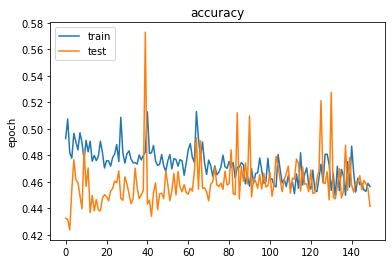

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('accuracy')
plt.ylabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')

 make_moon

In [9]:
from sklearn.preprocessing import scale
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
X, Y = make_moons(noise=0.2, random_state = 0, n_samples=1000)
X = scale(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5)

print(X.shape)  # (1000, 2)  <- 2개의 변수
print(Y.shape)  # (1000, )

(1000, 2)
(1000,)


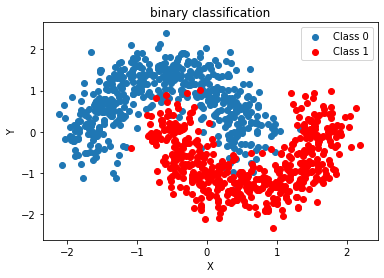

In [10]:
fig, ax = plt.subplots()
ax.scatter(X[Y==0,0], X[Y==0,1], label = 'Class 0')
ax.scatter(X[Y==1,0], X[Y==1,1], color = 'r', label = 'Class 1')
ax.legend()
ax.set(xlabel='X', ylabel='Y', title='binary classification');


In [11]:
# model 만들기
# 비선형 모델 - 신경망 (tensorflow)
import keras

model = Sequential()
# 행렬연산 => 설명을 확대 (논리적으로는 변수가 32개로 늘어난 것과 같다  <- 설명 32)
# 1000x2 에서  가중치 2x32  => 1000x32
model.add(Dense(32, input_dim=2, activation = 'relu'))  # 차원 확대
# 1000x32  32x1  => 1000x1  분류
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'AdaDelta', loss = 'binary_crossentropy', metrics=['accuracy'])

# callback 함수 : 
# window에서 자동으로 호출되는 함수
# 이미지 간단하게 출력하게 (호출)
# 콜백을 모델에 저장하면 모델을 사용할때 자동으로 그래프를 만들어서 호출될 준비를 한다
tb_callback = keras.callbacks.TensorBoard( # graph 이미지 출력
    log_dir = './Graph/model_1/', histogram_freq = 100,
                                         write_graph = True, write_images=False)

tb_callback.set_model(model) # 콜백을 모델에 등록

In [12]:
#hist = model.fit(X_train, Y_train, batch_size = 32, epochs=200, verbose=0, validation_data = (X_test, Y_test), callbacks=[tb_callback])

hist = model.fit(X_train, Y_train, batch_size=32, epochs=200, verbose= 0, validation_data = (X_test, Y_test), callbacks=[tb_callback])

In [13]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1243509404361248
Test accuracy: 0.9480000138282776


In [14]:
keras.utils.print_summary(model)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 32)                96        
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 33        
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


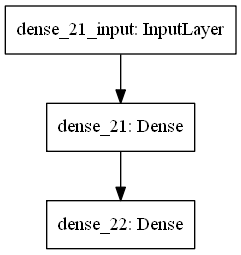

In [15]:
keras.utils.plot_model(model)

In [16]:
%matplotlib inline
from keras.utils.vis_utils import model_to_dot
model_to_dot(model)

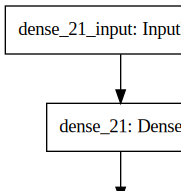

In [17]:
from IPython.display import Image, SVG
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [18]:
model.summary()


# 가중치가 있으면 바이어스도 있다
# bias가 96이라서..

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 32)                96        
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 33        
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


In [19]:
# callback class
# custom callback 힘수의 제작
# 함수에 의해서 호출되는 객체

class CustomHistory(keras.callbacks.Callback):  # 상속
    def init(self):
        self.train_loss = []
        self.val_loss=[]
        self.train_acc = []
        self.val_acc = []
        
    def on_epoch_end(self, batch, logs={}):   # 오버라이딩
        self.train_loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))
        self.train_acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))

In [20]:
from keras.datasets import mnist
import matplotlib.pylab as plt

(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()
print(X_train0.shape, X_train0.dtype)  
print(y_train0.shape, y_train0.dtype)
print(X_test0.shape, X_test0.dtype)
print(y_test0.shape, y_test0.dtype)

(60000, 28, 28) uint8
(60000,) uint8
(10000, 28, 28) uint8
(10000,) uint8


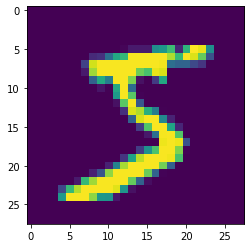

In [21]:
plt.imshow(X_train0[0])
plt.grid(False)
plt.show()

In [22]:
# fully-conndected : flatten : FFNN은
# 이미지 정규화 : 0~255 컬러값 / 255 => 0~1 
X_train = X_train0.reshape(60000, 784).astype('float32')/255.0
X_test = X_test0.reshape(10000, 784).astype('float32')/255.0
print(X_train.shape, X_train.dtype)   # 60000x784

(60000, 784) float32


In [23]:
y_train0[:5]   # one-hot encoding 여부  -> 안됨. [5, 0, 4, 1, 9] 

# 원핫인코딩 왜하는지? multi-label => softmax 
# 경우에 수에 대한 확률값

# [5, 0, 4, 1, 9]

array([5, 0, 4, 1, 9], dtype=uint8)

In [24]:
# one-hot encoding   [5, 0, 4, 1, 9]

from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train0, 10)
Y_test = np_utils.to_categorical(y_test0, 10)
Y_train[:5]


# 여기까지 데이터 만들기

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [25]:
# 모델 만들기
import numpy as np
from keras.optimizers import SGD

np.random.seed(0)
model = Sequential()

# 60000x784, 784x15  => 60000x15
model.add(Dense(15, input_dim = 784, activation = "sigmoid"))
# 60000x15, 15x10  => 60000x10  => sigmoid(확률값으로 출력)
model.add(Dense(10, activation = "sigmoid"))

# SGD : 확률적 경사하강법,    lr : learning_rate
# stochastic gradient descent
model.compile(optimizer=SGD(lr=0.2), loss = 'mean_squared_error', metrics = ["accuracy"])

In [26]:
model.layers

In [27]:
l1 = model.layers[0]
l2 = model.layers[1]
# 레이어 속성으로 정보 확인
l1.name
l1.input_shape
l1.output_shape
l1.activation

<function keras.activations.sigmoid(x)>

In [28]:
custom_hist = CustomHistory()
custom_hist.init()
hist = model.fit(X_train,Y_train, nb_epoch=30, batch_size=100,validation_data=(X_test, Y_test),callbacks = [custom_hist], verbose=2)

C:\Users\ICT01_01\Anaconda3\envs\tf_test\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 6s - loss: 0.1019 - accuracy: 0.2440 - val_loss: 0.0864 - val_accuracy: 0.3212
Epoch 2/30
 - 7s - loss: 0.0845 - accuracy: 0.3921 - val_loss: 0.0821 - val_accuracy: 0.4409
Epoch 3/30
 - 7s - loss: 0.0796 - accuracy: 0.4997 - val_loss: 0.0765 - val_accuracy: 0.5340
Epoch 4/30
 - 6s - loss: 0.0740 - accuracy: 0.5620 - val_loss: 0.0707 - val_accuracy: 0.5852
Epoch 5/30
 - 8s - loss: 0.0682 - accuracy: 0.6149 - val_loss: 0.0649 - val_accuracy: 0.6522
Epoch 6/30
 - 8s - loss: 0.0625 - accuracy: 0.6759 - val_loss: 0.0594 - val_accuracy: 0.6998
Epoch 7/30
 - 5s - loss: 0.0576 - accuracy: 0.7101 - val_loss: 0.0551 - val_accuracy: 0.7316
Epoch 8/30
 - 7s - loss: 0.0537 - accuracy: 0.7325 - val_loss: 0.0516 - val_accuracy: 0.7485
Epoch 9/30
 - 5s - loss: 0.0505 - accuracy: 0.7474 - val_loss: 0.0486 - val_accuracy: 0.7639
Epoch 10/30
 - 8s - loss: 0.0478 - accuracy: 0.7609 - val_loss: 0.0461 - val_accuracy: 0.7759
Epoch 11/30
 - 9s -

C:\Users\ICT01_01\Anaconda3\envs\tf_test\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 4s - loss: 0.0251 - accuracy: 0.8863 - val_loss: 0.0241 - val_accuracy: 0.8911
Epoch 2/30
 - 1s - loss: 0.0246 - accuracy: 0.8873 - val_loss: 0.0236 - val_accuracy: 0.8929
Epoch 3/30
 - 1s - loss: 0.0242 - accuracy: 0.8886 - val_loss: 0.0232 - val_accuracy: 0.8946
Epoch 4/30
 - 1s - loss: 0.0238 - accuracy: 0.8897 - val_loss: 0.0229 - val_accuracy: 0.8956
Epoch 5/30
 - 1s - loss: 0.0234 - accuracy: 0.8910 - val_loss: 0.0225 - val_accuracy: 0.8963
Epoch 6/30
 - 4s - loss: 0.0231 - accuracy: 0.8920 - val_loss: 0.0222 - val_accuracy: 0.8976
Epoch 7/30
 - 13s - loss: 0.0228 - accuracy: 0.8928 - val_loss: 0.0219 - val_accuracy: 0.8985
Epoch 8/30
 - 10s - loss: 0.0225 - accuracy: 0.8935 - val_loss: 0.0216 - val_accuracy: 0.8997
Epoch 9/30
 - 10s - loss: 0.0222 - accuracy: 0.8945 - val_loss: 0.0213 - val_accuracy: 0.9002
Epoch 10/30
 - 6s - loss: 0.0219 - accuracy: 0.8956 - val_loss: 0.0210 - val_accuracy: 0.9012
Epoch 11/30
 - 9

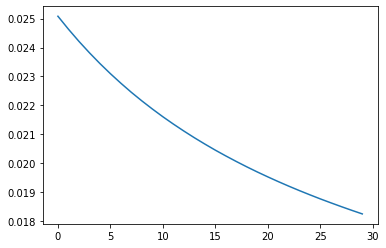

In [29]:
# fit 해주기

hist = model.fit(X_train, Y_train, nb_epoch=30, batch_size = 100, validation_data = (X_test, Y_test), verbose=2)

plt.plot(hist.history['loss'])
plt.show()

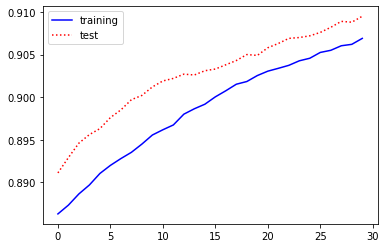

{'batch_size': 100, 'epochs': 30, 'steps': None, 'samples': 60000, 'verbose': 2, 'do_validation': True, 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}
[0.88628334, 0.88731664, 0.8886333, 0.8896833, 0.89103335, 0.89198333, 0.89278334, 0.89351666, 0.8944833, 0.89555, 0.8961667, 0.89673334, 0.898, 0.89863336, 0.89916664, 0.90003335, 0.90075, 0.9015167, 0.90183336, 0.90253335, 0.90305, 0.9033833, 0.9037333, 0.90426666, 0.90456665, 0.90525, 0.9055, 0.90603334, 0.9062, 0.9069]
0.909500002861023


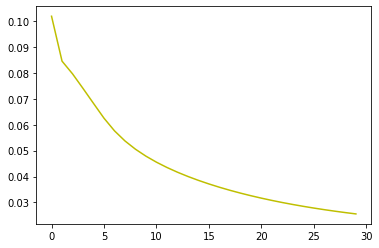

In [30]:
plt.plot(hist.history['accuracy'], 'b-', label = "training")
plt.plot(hist.history['val_accuracy'], 'r:', label="test")
plt.legend()
plt.show()

print(hist.model)
print(hist.params)
print(hist.history['accuracy'])
print(hist.history['val_accuracy'][29])

plt.show()
plt.plot(custom_hist.train_loss, 'y', label = 'train loss')
plt.show()

In [31]:
# 문제 X_test의 이미지 한장의 label을 예측해 보시오
model.predict(X_test[:1, :])

array([[0.00637829, 0.00547901, 0.00877038, 0.02193788, 0.00460088,
        0.03031099, 0.00612146, 0.9678394 , 0.00214405, 0.01650386]],
      dtype=float32)

In [32]:
model.predict_classes(X_test[:1, :], verbose=0)

array([7], dtype=int64)

In [33]:
# 출력차수가 512인 레이어를 추가하시오

# 모델 만들기
import numpy as np
from keras.optimizers import SGD

np.random.seed(0)
model = Sequential()

# 60000x784, 784x15  => 60000x15
model.add(Dense(512, input_dim = 784, activation = "sigmoid"))
model.add(Dense(15))
# 60000x15, 15x10  => 60000x10  => sigmoid(확률값으로 출력)
model.add(Dense(10, activation = "sigmoid"))

# SGD : 확률적 경사하강법,    lr : learning_rate
# stochastic gradient descent
model.compile(optimizer=SGD(lr=0.2), loss = 'mean_squared_error', metrics = ["accuracy"])

# Boston 집값 예측

In [34]:
from keras.datasets import boston_housing
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(404, 13)
(404,)
(102, 13)
(102,)


In [35]:
model = Sequential()
num_features = 13
model.add(Dense(1, input_dim = num_features, activation = 'linear'))

In [36]:
model.summary()

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics=['mae'])
model.fit(x_train, y_train, batch_size=1, epochs=10, verbose=1)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 1)                 14        
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
404/404 [==============================] - 0s 886us/step - loss: 34266.5818 - mae: 159.2374
Epoch 2/10
404/404 [==============================] - 0s 605us/step - loss: 1078.0009 - mae: 27.1595
Epoch 3/10
404/404 [==============================] - 0s 597us/step - loss: 521.9214 - mae: 18.9490
Epoch 4/10
404/404 [==============================] - 0s 585us/step - loss: 334.5479 - mae: 14.6229
Epoch 5/10
404/404 [==============================] - 0s 617us/step - loss: 245.3570 - mae: 12.2230
Epoch 6/10
404/404 [==============================] - 0s 598us/step - loss: 193.5331 - mae: 10.8006
Epoch 7/10
404/404 [===========================

In [37]:
# 위에서는 mae를 accuracy 로했는데
# 이번에는 metrics=['mae'] 로 해서

mse, mae = model.evaluate(x_test,y_test, verbose=False)
rmse = np.sqrt(mse)

mse, rmse, mae
# Mean Absolute Error = MAE

(122.7599998922909, 11.079711182710987, 8.785869598388672)

In [38]:
# 문제 : x_test의 앞의 3집을 예측해 보시오
print("예측값:" , "\n", model.predict(x_test[:3, :]) )  # 예측값
print()
#문제 실제 데이터(값)
print("실제값:" , "\n",y_test[:3])

예측값: 
 [[14.16508 ]
 [27.672049]
 [24.397264]]

실제값: 
 [ 7.2 18.8 19. ]


In [39]:

import numpy as np
pred =  model.predict(x_test[:3, :])
pred=pred[:,0]
real = y_test[:3]

# 상관계수를 확인하시오
np.corrcoef(pred,real)

array([[1.        , 0.96907559],
       [0.96907559, 1.        ]])

In [ ]:
새롭게

In [41]:
# scikits -- keras를 연결 : kerasClassifier, KerasRegressor

import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [47]:
# 768x9 => 768,8  독립변수, 768,1 종속변수
# 변수의 개수 8개 (입력이 8개)
def create_model():
    model = Sequential()
    # 가중치 : 8x12 => 768x12
    model.add(Dense(12, input_dim=8, activation ='relu'))
    # 768x12 => 768x1
    model.add(Dense(1, activation='sigmoid'))  # 0~1 사이값
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

seed=7  # 초기화
numpy.random.seed(seed)
dataset= numpy.loadtxt("pima.csv", delimiter=",")  # 데이터로딩

X = dataset[:,0:8]
Y = dataset[:,8]

model = KerasClassifier(build_fn=create_model, verbose=0)  # verbose=0 : 설명을 달아줄 것인가 아닌가 (0은 아님, 1은 설명추가)

In [49]:
# 파라미터 조합
batch_size = [10,20,40,60,80,100]
epochs = [10,50,100]

# 매개변수 입력 형태는 dictionary
param_grid = dict(batch_size = batch_size, epochs=epochs)

# n_jobs = -1 : cpu 개수 // -1 이면 다 참여하라는 것
grid = GridSearchCV(estimator=model, param_grid = param_grid,n_jobs = -1)

grid_result = grid.fit(X,Y)
print("최적스코어: %f     사용한 파라미터조합 :  %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']


for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

C:\Users\ICT01_01\Anaconda3\envs\tf_test\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


최적스코어: 0.693973     사용한 파라미터조합 :  {'batch_size': 10, 'epochs': 100}
0.566471 (0.085154) with: {'batch_size': 10, 'epochs': 10}
0.651150 (0.053111) with: {'batch_size': 10, 'epochs': 50}
0.693973 (0.029139) with: {'batch_size': 10, 'epochs': 100}
0.631627 (0.057224) with: {'batch_size': 20, 'epochs': 10}
0.673220 (0.047679) with: {'batch_size': 20, 'epochs': 50}
0.661438 (0.051960) with: {'batch_size': 20, 'epochs': 100}
0.554843 (0.075776) with: {'batch_size': 40, 'epochs': 10}
0.636856 (0.058902) with: {'batch_size': 40, 'epochs': 50}
0.692802 (0.042697) with: {'batch_size': 40, 'epochs': 100}
0.570274 (0.053936) with: {'batch_size': 60, 'epochs': 10}
0.632926 (0.036785) with: {'batch_size': 60, 'epochs': 50}
0.679722 (0.026114) with: {'batch_size': 60, 'epochs': 100}
0.546762 (0.059044) with: {'batch_size': 80, 'epochs': 10}
0.611901 (0.058409) with: {'batch_size': 80, 'epochs': 50}
0.691427 (0.035786) with: {'batch_size': 80, 'epochs': 100}
0.578211 (0.082131) with: {'batch_size': 1

문제

1. 가중치 초기화 (kernel_initializer) 매개변수를 넣고 이를      
['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal','glorot_uniform','he_normal','he_uniform']       
    로 테스트 해서 가장 최적의 가중치 초기화 파라미터를 결장하시오.       

2. dense1: activation 함수를 달아주고        
    ['softmax', 'softplus','softsign','relu','tanh','sigmoid','hard_sigmoid','linear']            
    의 조합중 가장 좋은 activation 함수를 결정하시오.        
    

In [59]:
# model.add(Dense(12, kernel_initializer = 'glorot_normal',input_dim=8, activation ='softplus')) 일때
# 

init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal','glorot_uniform','he_normal','he_uniform']       
activation =  ['softmax', 'softplus','softsign','relu','tanh','sigmoid','hard_sigmoid','linear']

# def 에 create_model(init_mode, activation) 여기에 넣어야 작동할수 있다!!!
def create_model(init_mode, activation):
    model = Sequential()
    # 가중치 : 8x12 => 768x12
    model.add(Dense(12, kernel_initializer = init_mode,input_dim=8, activation =activation))
    model.add(Dropout(dropout_rate))
    # 768x12 => 768x1
    model.add(Dense(1, activation='sigmoid'))  # 0~1 사이값
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

seed=7  # 초기화
numpy.random.seed(seed)
dataset= numpy.loadtxt("pima.csv", delimiter=",")  # 데이터로딩

X = dataset[:,0:8]
Y = dataset[:,8]

model = KerasClassifier(build_fn=create_model, verbose=0) 


batch_size = [10,20,40,60,80,100]
epochs = [10,50,100]

# 매개변수 입력 형태는 dictionary
param_grid = dict(init_mode=init_mode,activation=activation)


# n_jobs = -1 : cpu 개수 // -1 이면 다 참여하라는 것
grid = GridSearchCV(estimator=model, param_grid = param_grid,n_jobs = -1)

grid_result = grid.fit(X,Y)
print("최적스코어: %f     사용한 파라미터조합 :  %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']


for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

최적스코어: 0.660250     사용한 파라미터조합 :  {'activation': 'hard_sigmoid', 'init_mode': 'uniform'}
0.613471 (0.095308) with: {'activation': 'softmax', 'init_mode': 'uniform'}
0.481691 (0.131894) with: {'activation': 'softmax', 'init_mode': 'lecun_uniform'}
0.649851 (0.050117) with: {'activation': 'softmax', 'init_mode': 'normal'}
0.651159 (0.052445) with: {'activation': 'softmax', 'init_mode': 'zero'}
0.500475 (0.156098) with: {'activation': 'softmax', 'init_mode': 'glorot_normal'}
0.517401 (0.153573) with: {'activation': 'softmax', 'init_mode': 'glorot_uniform'}
0.484543 (0.147767) with: {'activation': 'softmax', 'init_mode': 'he_normal'}
0.425465 (0.114249) with: {'activation': 'softmax', 'init_mode': 'he_uniform'}
0.564876 (0.126353) with: {'activation': 'softplus', 'init_mode': 'uniform'}
0.442518 (0.118394) with: {'activation': 'softplus', 'init_mode': 'lecun_uniform'}
0.506561 (0.077225) with: {'activation': 'softplus', 'init_mode': 'normal'}
0.629047 (0.061856) with: {'activation': 'softp

In [60]:
# 영택이 코드

# Use scikit-learn to grid search the weight initialization
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
# Function to create model, required for KerasClassifier

def create_model(init_mode='uniform',optimizer='relu'):
   # create model
   model = Sequential()
   model.add(Dense(12, input_dim=8, kernel_initializer=init_mode, activation=optimizer))
   model.add(Dense(1, kernel_initializer=init_mode, activation=optimizer))
   # Compile model
   model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
   return model

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load dataset
dataset = numpy.loadtxt("pima.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=1)

# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform','normal','zero','glorot_normal','glorot_uniform','he_normal','he_uniform']
optimizer = ['softmax', 'softplus', 'softsign','relu','tanh','sigmoid','hard_sigmoid','linear']
param_grid = dict(init_mode=init_mode,optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Epoch 1/100
768/768 [==============================] - 0s 470us/step - loss: 0.7133 - accuracy: 0.5768
Epoch 2/100
768/768 [==============================] - 0s 99us/step - loss: 0.6772 - accuracy: 0.6276
Epoch 3/100
768/768 [==============================] - 0s 93us/step - loss: 0.6533 - accuracy: 0.6576
Epoch 4/100
768/768 [==============================] - 0s 95us/step - loss: 0.6331 - accuracy: 0.6562
Epoch 5/100
768/768 [==============================] - 0s 96us/step - loss: 0.6241 - accuracy: 0.6719
Epoch 6/100
768/768 [==============================] - 0s 104us/step - loss: 0.6139 - accuracy: 0.6706
Epoch 7/100
768/768 [==============================] - 0s 97us/step - loss: 0.6087 - accuracy: 0.6784
Epoch 8/100
768/768 [==============================] - 0s 91us/step - loss: 0.6017 - accuracy: 0.6927
Epoch 9/100
768/768 [==============================] - 0s 92us/step - loss: 0.6066 - accuracy: 0.6823
Epoch 10/100
768/768 [==============================] - 0s 101us/step - loss: 0.

768/768 [==============================] - 0s 161us/step - loss: 0.5395 - accuracy: 0.7279
Epoch 81/100
768/768 [==============================] - 0s 129us/step - loss: 0.5426 - accuracy: 0.7331
Epoch 82/100
768/768 [==============================] - 0s 105us/step - loss: 0.5601 - accuracy: 0.7070
Epoch 83/100
768/768 [==============================] - 0s 97us/step - loss: 0.5445 - accuracy: 0.7174
Epoch 84/100
768/768 [==============================] - 0s 105us/step - loss: 0.5620 - accuracy: 0.7201
Epoch 85/100
768/768 [==============================] - 0s 97us/step - loss: 0.5443 - accuracy: 0.7253
Epoch 86/100
768/768 [==============================] - 0s 132us/step - loss: 0.5385 - accuracy: 0.7279
Epoch 87/100
768/768 [==============================] - 0s 103us/step - loss: 0.5378 - accuracy: 0.7292
Epoch 88/100
768/768 [==============================] - 0s 97us/step - loss: 0.5311 - accuracy: 0.7279
Epoch 89/100
768/768 [==============================] - 0s 100us/step - loss: 0.

Dropout & EarlyStopping

In [64]:
# Use scikit-learn to grid search the weight initialization
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping
stopper = EarlyStopping(monitor='var_accuracy', patience=3, verbose=1)

# Function to create model, required for KerasClassifier
def create_model(init_mode='uniform',optimizer='relu',dropout_rate=0.1):

    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, kernel_initializer=init_mode, activation=optimizer))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load dataset
dataset = numpy.loadtxt("pima.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# create model
# Earlystopping
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=1)

# define the grid search parameters
dropout_rate=[0.1,0.2,0.3] # ,0.4,0.5,0.6,0.7,0.8,0.9
init_mode = ['uniform', 'lecun_uniform']# ,'normal','zero','glorot_normal','glorot_uniform','he_normal','he_uniform'
optimizer = ['softmax','relu'] #, 'softplus', 'softsign','tanh','sigmoid','hard_sigmoid','linear'
param_grid = dict(init_mode=init_mode,optimizer=optimizer,dropout_rate=dropout_rate)
fit_params = dict(callbacks=[stopper])
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

# 변동 매개변수
grid_result = grid.fit(X, Y, **fit_params)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Epoch 1/100
768/768 [==============================] - 0s 536us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 2/100
768/768 [==============================] - 0s 122us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 3/100
768/768 [==============================] - 0s 110us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 4/100
 10/768 [..............................] - ETA: 0s - loss: 4.6275 - accuracy: 0.7000

C:\Users\ICT01_01\Anaconda3\envs\tf_test\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `var_accuracy` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


768/768 [==============================] - 0s 102us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 5/100
768/768 [==============================] - 0s 102us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 6/100
768/768 [==============================] - 0s 102us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 7/100
768/768 [==============================] - 0s 108us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 8/100
768/768 [==============================] - 0s 102us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 9/100
768/768 [==============================] - 0s 122us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 10/100
768/768 [==============================] - 0s 93us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 11/100
768/768 [==============================] - 0s 142us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 12/100
768/768 [==============================] - 0s 102us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 13/100
768/768 [==============================] - 0s 132us/step - loss: 5.382

768/768 [==============================] - 0s 109us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 84/100
768/768 [==============================] - 0s 108us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 85/100
768/768 [==============================] - 0s 101us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 86/100
768/768 [==============================] - 0s 106us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 87/100
768/768 [==============================] - 0s 101us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 88/100
768/768 [==============================] - 0s 113us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 89/100
768/768 [==============================] - 0s 99us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 90/100
768/768 [==============================] - 0s 97us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 91/100
768/768 [==============================] - 0s 97us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 92/100
768/768 [==============================] - 0s 95us/step - loss: 5.3

housing

In [65]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pandas 

In [71]:
dataframe = pandas.read_csv("housing.csv", delim_whitespace=True, header=None)
dataset = dataframe.values
X = dataset[:,0:13]
Y = dataset[:,13]  # reshape


# baseline model
def baseline_model():
    model = Sequential()
    # 506x13  , 13x13  => 506 x 13
    model.add(Dense(13, input_dim = 13, kernel_initializer = 'normal', activation = 'relu'))
    # 506 x13 , 13x1  => 506 x 1
    model.add(Dense(1, kernel_initializer = 'normal'))
    model.compile(loss = 'mean_squared_error', optimizer = 'adam')
    return model
# 이 모델은 compile 까지만 작동


seed = 7
numpy.random.seed(seed)
estimator = KerasRegressor(build_fn = baseline_model, nb_epoch = 100, batch_size = 5, verbose=0)
# fitting 할때  nb_epoch, batch_size

kfold = KFold(n_splits = 10, random_state = seed)
results = cross_val_score(estimator, X, Y, cv = kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

# 학습도 하지 않았는데 cross_val_score 하는 이유? 매개변수값을 넣어주고 . 알아서 데이터를 나눠서 지정한 10개중에서 1개는 validation(검증)
# 으로 사용되어진다. 

C:\Users\ICT01_01\Anaconda3\envs\tf_test\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Results: -114.84 (83.17) MSE


In [73]:
numpy.random.seed(seed)
estimators = []  # 리스트 생성
estimators.append(('standardize' , StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn = baseline_model, epochs = 50, batch_size = 5, verbose=0)))

# pipeline의 매개변수가 리스트를 요구
pipeline = Pipeline(estimators)
kfold = KFold(n_splits = 10, random_state = seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))


Standardized: -29.28 (27.78) MSE


In [74]:
pipeline.fit(X,Y)

Pipeline(memory=None,
         steps=[('standardize',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('mlp',
                 <keras.wrappers.scikit_learn.KerasRegressor object at 0x0000023FF6187AC8>)],
         verbose=False)

In [75]:
# predict를 하려면 ?

res = pipeline.predict(X)
res[0]

29.819494

In [76]:
# 상관계수

import  numpy as np
np.corrcoef(res[0], Y[0])

C:\Users\ICT01_01\Anaconda3\envs\tf_test\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\ICT01_01\Anaconda3\envs\tf_test\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\ICT01_01\Anaconda3\envs\tf_test\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


array([[nan, nan],
       [nan, nan]])

larger_model

In [ ]:
# baseline model보다  deep 해짐

def larger_model():
    model = Sequential()
    model.add(Dense(13, input_dim = 13, kernel_initializer = 'normal', activation = 'relu'))
    model.add(Dense(6, kernel_initializer = 'normal', activation = 'relu'))
    model.add(Dense(1, kernel_initializer = 'normal'))
    model.compile(loss = 'mean_squared_error', optimizer = 'adam')
    return model


seed = 7
numpy.random.seed(seed)
estimator = KerasRegressor(build_fn = larger_model, nb_epoch = 100, batch_size = 5, verbose=0)

kfold = KFold(n_splits = 10, random_state = seed)
results = cross_val_score(estimator, X, Y, cv = kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

In [ ]:
# 은닉층을 더 줌 :20 

def wider_model():
    model = Sequential()
    # 506x13  , 13x13  => 506 x 13
    model.add(Dense(20, input_dim = 13, kernel_initializer = 'normal', activation = 'relu'))
    # 506 x13 , 13x1  => 506 x 1
    model.add(Dense(1, kernel_initializer = 'normal'))
    model.compile(loss = 'mean_squared_error', optimizer = 'adam')
    return model

seed = 7
numpy.random.seed(seed)
estimator = KerasRegressor(build_fn = wider_model, nb_epoch = 100, batch_size = 5, verbose=0)

kfold = KFold(n_splits = 10, random_state = seed)
results = cross_val_score(estimator, X, Y, cv = kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))



C:\Users\ICT01_01\Anaconda3\envs\tf_test\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
# 숙제 
- iris.csv 데이터를 로딩한 다음
- 회귀망을 구성하시오
- parameter tuning 을 구현하시오 (pipeline 사용도 함께)